In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados = dados.rename(columns = a_renomear)

a_trocar = {
    'yes': 1,
    'no': 0
}

dados['vendido'] = dados.vendido.map(a_trocar)

In [3]:
# Vamos alterar a coluna ano_do_modelo para trabalharmos com a idade do carro
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [4]:
# Alterando milhas para km (1 milha = 1,60934km)

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()


,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [5]:
# Dropando as colunas que não serão usadas

dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])

In [6]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acúracia foi de {acuracia}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acúracia foi de 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# Criando um baseline para testarmos, usariamos:
# np.ones(2500)
# Porém o sklearn já possui um estimador 'bobo' (um dummy) que faz isso pra gente

from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier(strategy='stratified') #Criando meu algoritmo bobo, ele possui os métodos tradicionais como fit e predict
dummy_stratified.fit(treino_x, treino_y)
# Aqui podemos usar o método .score do dummy, ao inves de utilizar o accuracy_score e diminuir o código em uma linha
acuracia = dummy_stratified.score(teste_x, teste_y)*100

print(f"A acuracia do dummy stratified foi de {acuracia}%")



A acuracia do dummy stratified foi de 50.36000000000001%


In [21]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = dummy_most_frequent.score(teste_x, teste_y)*100

print(f"A acuracia do dummy most_frequent foi de {acuracia}%")

A acuracia do dummy most_frequent foi de 57.99999999999999%


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")


scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acúracia foi de {acuracia}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acúracia foi de 77.48%


In [41]:
# Agora iremos usar um algoritmo de classificação que nos de as regras - para que nós, como seres humanos
# entendam porque as decisões estão sendo tomadas.

#ex: o preço desse é maior que 25 mil, a km é maior que 30km, etc etc, por isso ele será vendido.

# O algoritmo responsável é o decision tree classifier do sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos")

# A ARVORE DE DECISÃO NÃO EXIGE QUE A GENTE ESCALE PARA FUNCIONAR BEM, ENTÃO VAMOS TIRAR AQUI
# SE NÃO NOSSOS DADOS NA VISUALIZAÇÃO VAI ESTAR ESCALADO E COM NÚMEROS SEM ENTENDIMENTO PARA NÓS
# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)


modelo = DecisionTreeClassifier(max_depth=3) # Colocamos o max_depth 2 depois de rodar a celular 32 abaixo e ver que a árvore ficou gigante de enorme, ai setamos a profundidade
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acúracia foi de {acuracia}%")


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acúracia foi de 79.28%


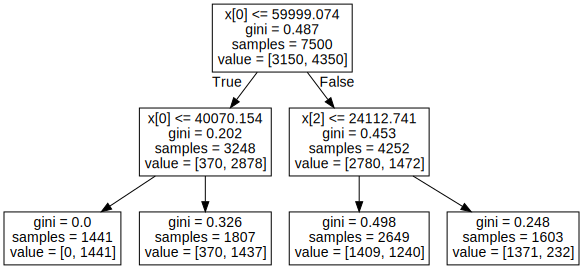

In [39]:
# Para exportar a visualização gráfica dessa árvore, nós vamos usar
# o sklearn export_graphviz

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo) # aquiele retorna formato dot_data
grafico = graphviz.Source(dot_data)
grafico

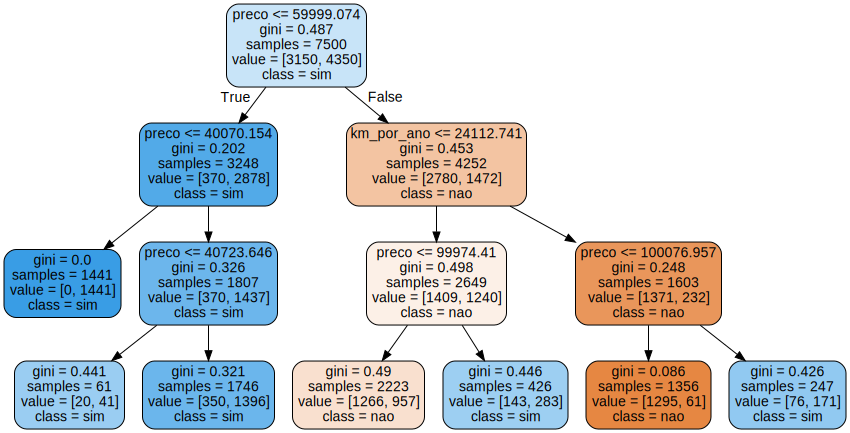

In [42]:
# Vamos passar para o gráfico alguns parâmetros para melhorar a visualização dele

features = x.columns
dot_data = export_graphviz(modelo,
                           filled = True, rounded = True,
                           class_names = ["nao", "sim"], # O 0 e 1 que definimos no início
                           feature_names = features) # aquiele retorna formato dot_data
grafico = graphviz.Source(dot_data)
grafico

# samples = quantos dados cairam nessa decisão
# ex, no inicio foram 7500, depois 3248 e 4252, etc